In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
from scipy.optimize import curve_fit

In [2]:
def func(x, m, b):
    return m*x+b

In [3]:
drc = np.genfromtxt('sDRC_2606/fit_bkgd_drc.dat',names=True)
aper = np.genfromtxt('sDRC_2606/fit_bkgd_aper.dat',names=True)

In [21]:
popt_drc, pcov = curve_fit(func, drc['bkgd_f606w'], drc['bkgd_f814w'])

In [23]:
popt_aper, pcov = curve_fit(func, aper['sky606APER'], aper['sky814APER'])

In [ ]:
p0_aper = popt

In [ ]:
# fig.colorbar(im, cax=cax, orientation='vertical')

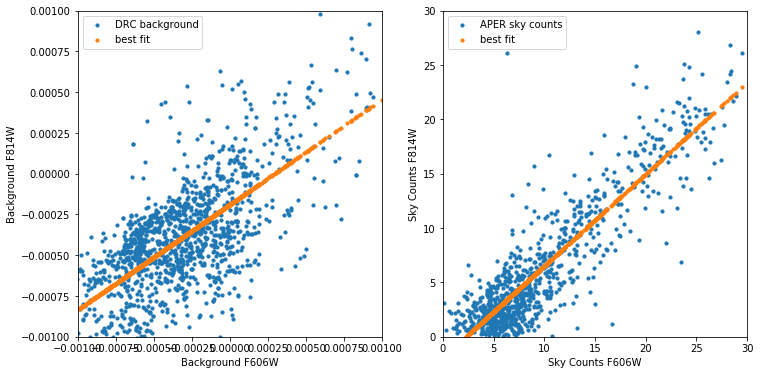

In [46]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))


ax1.scatter(drc['bkgd_f606w'],drc['bkgd_f814w'],s=10,label='DRC background')
ax1.scatter(drc['bkgd_f606w'], func(drc['bkgd_f606w'], *popt_drc),s=10,label='best fit')

ax1.set_xlabel('Background F606W')
ax1.set_ylabel('Background F814W')
# ax.scatter(aper['sky606APER'], func(aper['sky606APER'], *popt_drc),s=30,\
#            c=aper['magr_f606w'],marker='P',label='DRC func')

# ax.scatter(drc['bkgd_f606w'], func(drc['bkgd_f606w'], *popt_aper),s=10)
# ax.scatter(aper['sky606APER'], func(aper['sky606APER'], *popt_aper),s=30,
#             c=aper['m606cAPER'],marker='d',label='APER func')
ax2.scatter(aper['sky606APER'],aper['sky814APER'],s=10,label='APER sky counts')
ax2.scatter(aper['sky606APER'], func(aper['sky606APER'], *popt_aper),s=10,label='best fit')
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='5%', pad=0.05)
ax2.set_xlabel('Sky Counts F606W')
ax2.set_ylabel('Sky Counts F814W')

ax1.legend()
ax2.legend()

ax1.set_xlim(-0.001,0.001)
ax1.set_ylim(-0.001,0.001)

ax2.set_xlim(0,30)
ax2.set_ylim(0,30)
# fig.colorbar(im, cax=cax, orientation='vertical')

plt.show()

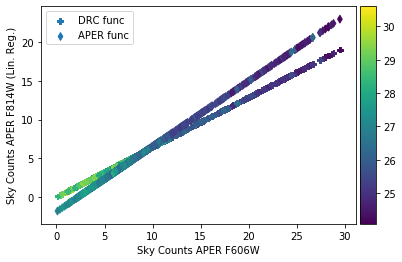

In [35]:
fig,ax = plt.subplots()

# ax.scatter(drc['bkgd_f606w'], func(drc['bkgd_f606w'], *popt_drc),s=10)
ax.scatter(aper['sky606APER'], func(aper['sky606APER'], *popt_drc),s=30,\
           c=aper['magr_f606w'],marker='P',label='DRC func')

# ax.scatter(drc['bkgd_f606w'], func(drc['bkgd_f606w'], *popt_aper),s=10)
im=ax.scatter(aper['sky606APER'], func(aper['sky606APER'], *popt_aper),s=30,
            c=aper['m606cAPER'],marker='d',label='APER func')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

ax.legend()

ax.set_xlabel('Sky Counts APER F606W')
ax.set_ylabel('Sky Counts APER F814W (Lin. Reg.)')

fig.colorbar(im, cax=cax, orientation='vertical')

plt.show()

In [27]:
print(popt_drc)
print(popt_aper)

[ 6.45582169e-01 -1.89355083e-04]
[ 0.844736   -1.92571247]


In [36]:
print(popt_drc[0]-popt_aper[0])

-0.19915383001944453


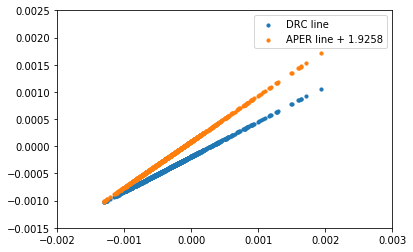

In [64]:
fig,ax = plt.subplots()

ax.scatter(drc['bkgd_f606w'], func(drc['bkgd_f606w'], *popt_drc),s=10,label='DRC line')
# ax.scatter(aper['sky606APER'], func(aper['sky606APER'], *popt_drc),s=10)

ax.scatter(drc['bkgd_f606w'], func(drc['bkgd_f606w'], *popt_aper)+1.9258,s=10,label='APER line + 1.9258')
# ax.scatter(aper['sky606APER'], func(aper['sky606APER'], *popt_aper),s=10)

# ax.set_yscale('symlog')
# ax.set_xscale('symlog')

ax.legend()
ax.set_xlim(-0.002,0.003)
ax.set_ylim(-0.0015,0.0025)

plt.show()